# Graph Data

/Users/Chandler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


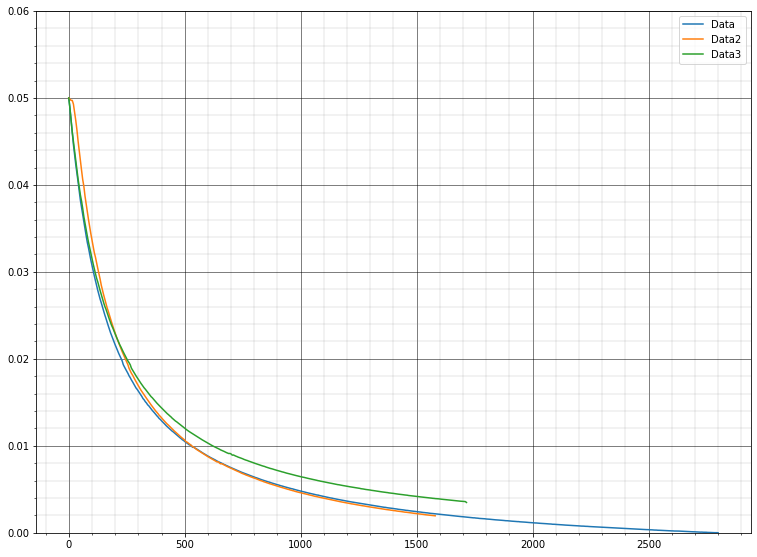

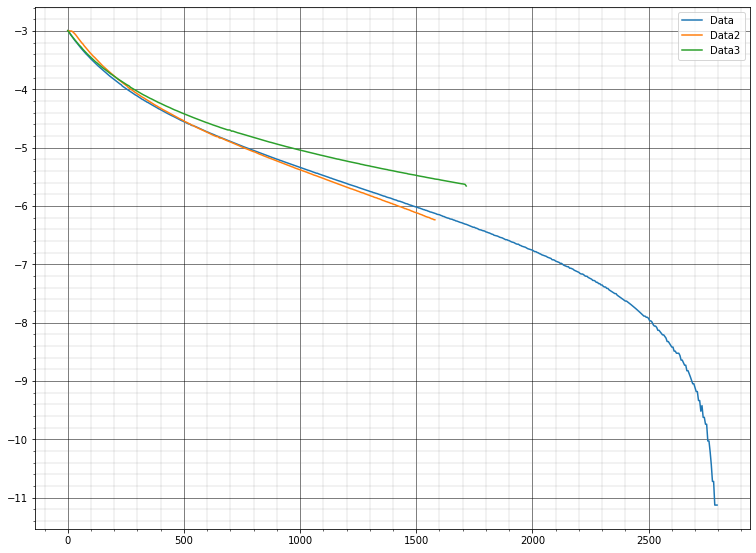

In [10]:
import pandas as pd
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Data Concentration/24_5Cdata1.csv")
data2 = pd.read_csv("Data Concentration/24_5Cdata2.csv")
data3 = pd.read_csv("Data Concentration/24_5Cdata3.csv")
tf = data["Time (sec)"][len(data["Time (sec)"])-1]
tf2 = data2["Time (sec)"][len(data2["Time (sec)"])-1]
tf3 = data3["Time (sec)"][len(data3["Time (sec)"])-1]

plt.figure(1,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],data["Conc Ea (mol/L)"],label="Data")
plt.plot(data2["Time (sec)"],data2["Conc Ea (mol/L)"],label="Data2")
plt.plot(data3["Time (sec)"],data3["Conc Ea (mol/L)"],label="Data3")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
plt.ylim(0,0.06)
plt.legend()

# _A = 1/data["Conc Ea (mol/L)"]
_A = np.log(data["Conc Ea (mol/L)"])
_A2 = np.log(data2["Conc Ea (mol/L)"])
_A3 = np.log(data3["Conc Ea (mol/L)"])

plt.figure(2,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],_A,label="Data")
plt.plot(data2["Time (sec)"],_A2,label="Data2")
plt.plot(data3["Time (sec)"],_A3,label="Data3")

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
plt.legend()


In [13]:
from scipy.interpolate import interp1d
import pandas as pd
import os

updateFile = True
T = 24.4

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
#         temp = pd.DataFrame(columns=["k (s^-1)"])
#         temp.to_csv("Kvalues/KbyTemp.csv", index=False, encoding='utf8')
ensure_dir("Kvalues/KbyTemp.csv")
try:
    myKs = pd.read_csv("Kvalues/KbyTemp.csv")
except:
    temp = pd.DataFrame(columns=["Temperature (°C)","kavg (s^-1)","k1 (s^-1)","k2 (s^-1)","k3 (s^-1)"])
    temp.to_csv("Kvalues/KbyTemp.csv", index=False, encoding='utf8')
    myKs = pd.read_csv("Kvalues/KbyTemp.csv")

dataTerp1 = interp1d(data["Time (sec)"],_A)
dataTerp2 = interp1d(data2["Time (sec)"],_A2)
dataTerp3 = interp1d(data3["Time (sec)"],_A3)

k1 = -(dataTerp1(1000)-dataTerp1(1100))/(1000-1100) #s^-1
k2 = -(dataTerp2(1000)-dataTerp2(1100))/(1000-1100) #s^-1
k3 = -(dataTerp3(1000)-dataTerp3(1100))/(1000-1100) #s^-1
kavg = (k1 + k2 + k3)/3

print("k1 =",k1,"s^-1")
print("k2 =",k2,"s^-1")
print("k3 =",k3,"s^-1")
print("kavg =",kavg,"s^-1")

if updateFile:
    df = pd.DataFrame(data={'Temperature (°C)': [T], 'kavg (s^-1)': [kavg], 'k1 (s^-1)': [k1], 'k2 (s^-1)': [k2], 'k3 (s^-1)': [k3]})
    myKs = myKs.append(df)
#     myKs.sort_values(by="Temperature (°C)", ascending=True)
    myKs.to_csv("Kvalues/KbyTemp.csv", index=False, encoding='utf8')

myKs

k1 = 0.0013792314320550147 s^-1
k2 = 0.0014717661049118557 s^-1
k3 = 0.0009664292100559279 s^-1
kavg = 0.0012724755823409328 s^-1


,Temperature (°C),kavg (s^-1),k1 (s^-1),k2 (s^-1),k3 (s^-1)
0,47.0,0.006103,0.005997,0.006313,0.006000
0,24.4,0.001272,0.001379,0.001472,0.000966
